In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [19]:
#antecedent
quality = ctrl.Antecedent(np.arange(0,11,1), 'quality')
service = ctrl.Antecedent(np.arange(0,11,1), 'service')
tip = ctrl.Consequent(np.arange(0,26,1), 'tip')

In [20]:
#membership function
quality.automf(3)
service.automf(3)

In [21]:
#custom membership function
tip['low'] = fuzz.trimf(tip.universe, [0,0,13])
tip['medium'] = fuzz.trimf(tip.universe, [0,13,25])
tip['high'] = fuzz.trimf(tip.universe, [13,25,25])

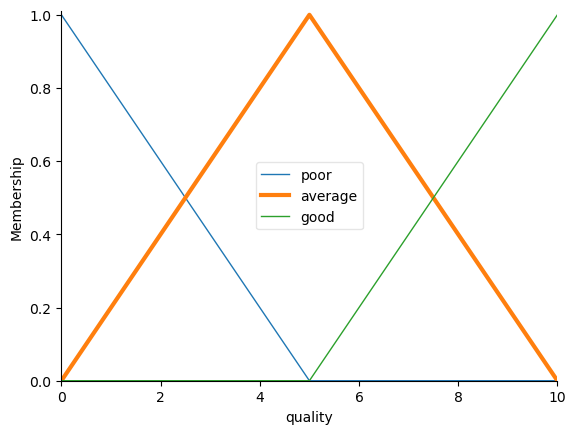

In [22]:
quality['average'].view()

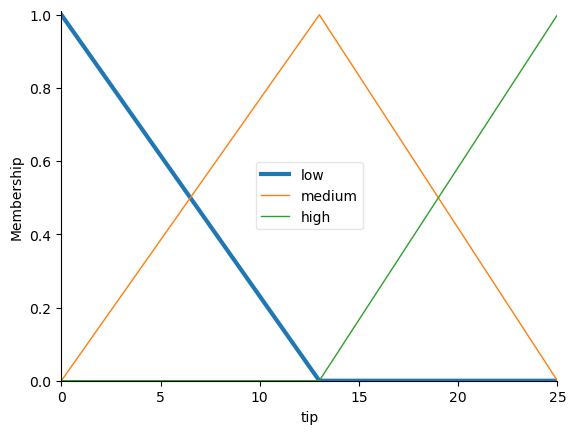

In [23]:
tip['low'].view()

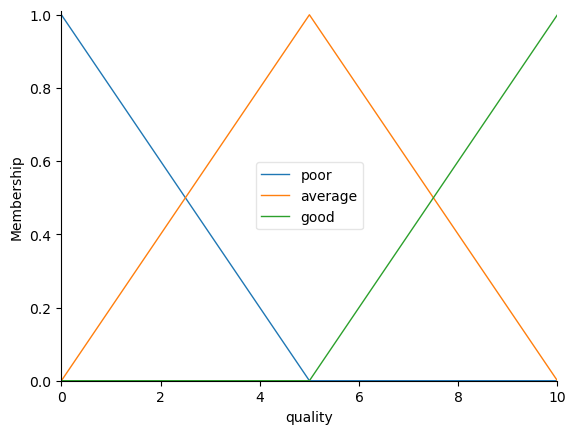

In [24]:
quality.view()

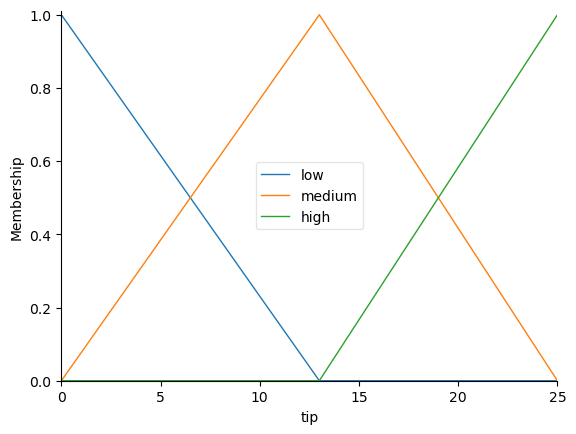

In [25]:
tip.view()

AttributeError: 'ControlSystemVisualizer' object has no attribute 'ctrl'

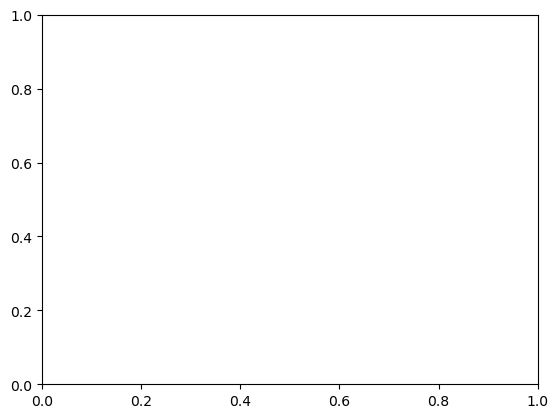

In [26]:
#the rules
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule( service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

rule2.view()

In [27]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [28]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [29]:
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

tipping.compute()

In [31]:
print(tipping.output['tip'])

19.847607361963192


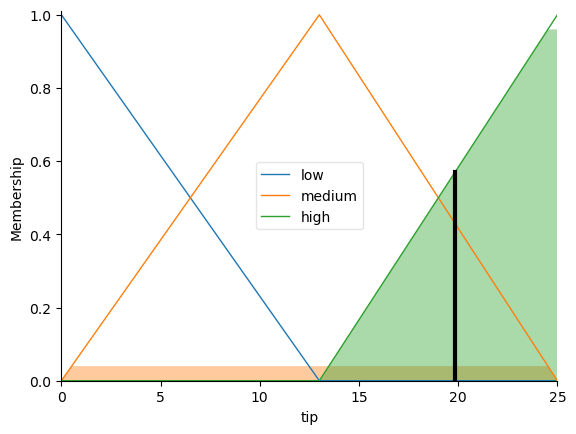

In [32]:
tip.view(sim=tipping)